# Gaussian beam profiling using a knife edge

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.special import erfc

### Defining our power function
We assume that the power of our beam follows:
$$
P(x) = P_\text{offset} + \frac{1}{2}P_\text{max}\cdot\text{erfc}\left(\frac{\sqrt{2}(x-x_0)}{w}\right)
$$
with $P_\text{offset}$  the background power, $P_\text{max}$ the maximum laser power, $w$ the beam radius, $x$ the blade position, and $x_0$ the blade position at the center of the beam profile. Note that **erfc** is the complimentary error function.

In [2]:
def power_func(h: np.ndarray, offset, max_p, h0, w) -> np.ndarray[np.float64]:
    p = offset + max_p / 2 * erfc(np.sqrt(2) * (h - h0) / w)
    return p.astype(np.float64)

### Open data

Text(0.5, 1.0, 'data')

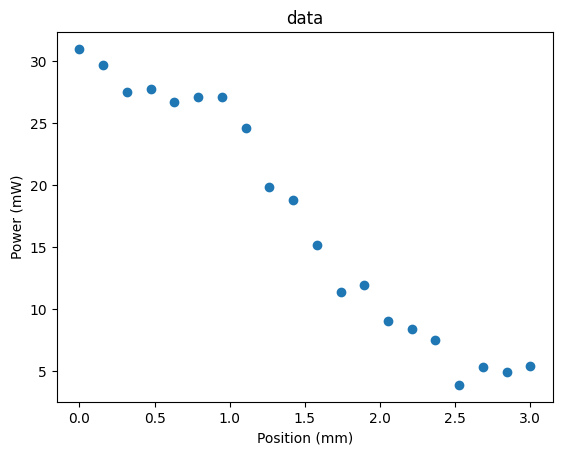

In [3]:
path = ''
filename = 'fictional data.xlsx'
df = pd.read_excel(path + filename, header=0)
position = np.array(df['Position'])
power = np.array(df['Power'])
plt.scatter(position, power)
plt.xlabel('Position (mm)')
plt.ylabel('Power (mW)')
plt.title('data')

### Perform the fit
Uses `scipy.optimize.curve_fit()`, which Use non-linear least squares to fit a function to data.

In [15]:
from scipy.optimize import curve_fit

params, cov = curve_fit(power_func, xdata=position, ydata=power)
err = np.sqrt(np.diag(cov))  # compute the standard deviations for the fitted parameters

### Results


Background power: 4.89 ± 0.74 mW
Max laser power: 24.67 ± 1.20 mW
Beam center position: 1.49 ± 0.05 mm 

Beam radius (1/e^2 in the intensity distribution): 1.141 ± 0.134 mm
Beam diameter (2 * 1/e^2 in the intensity distribution): 2.281 ± 0.267 mm
FWHM in the intensity distribution: 1.343 ± 0.157 mm



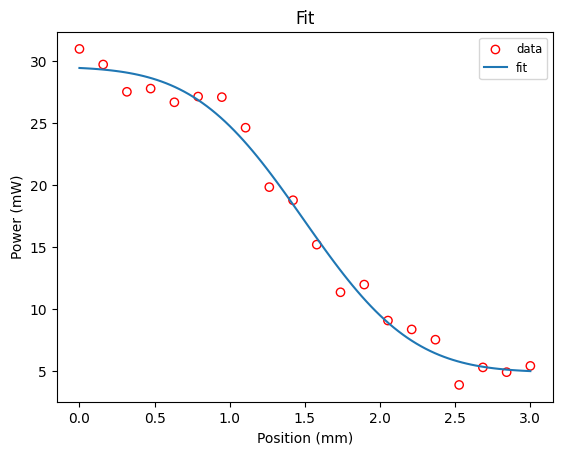

In [19]:
plt.scatter(position, power, facecolors='none', edgecolors='r', label='data')
x = np.linspace(min(position), max(position), 100)
plt.plot(x, power_func(x, *params), label='fit')
plt.xlabel('Position (mm)')
plt.ylabel('Power (mW)')
plt.title('Fit')
plt.legend(fontsize='small')

print(f"""
Background power: {params[0]:.2f} ± {err[0]:.2f} mW
Max laser power: {params[1]:.2f} ± {err[1]:.2f} mW
Beam center position: {params[2]:.2f} ± {err[2]:.2f} mm \n
Beam radius (1/e^2 in the intensity distribution): {params[3]:.3f} ± {err[3]:.3f} mm
Beam diameter (2 * 1/e^2 in the intensity distribution): {2 * params[3]:.3f} ± {2 * err[3]:.3f} mm
FWHM in the intensity distribution: {params[3] * np.sqrt(2 * np.log(2)):.3f} ± {err[3] * np.sqrt(2 * np.log(2)):.3f} mm
""")

Text(0.5, 1.0, 'Residuals')

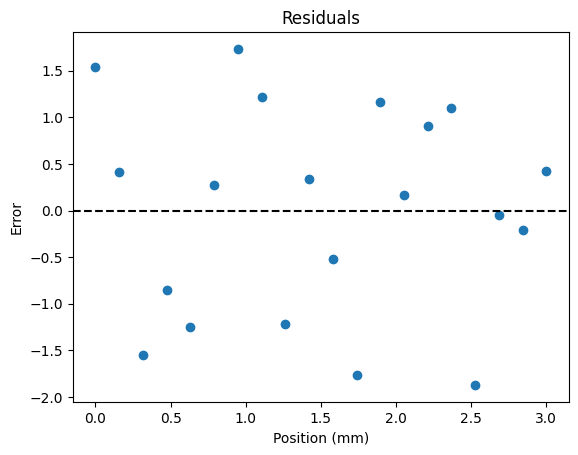

In [6]:
plt.scatter(position, power - power_func(position, *params))
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel('Position (mm)')
plt.ylabel('Error')
plt.title('Residuals')